In [47]:
# Standard libraries and external dependencies
import sys           # System-specific parameters and functions
import pandas as pd  # Data manipulation library
import numpy as np   # Numerical operations library
from IPython.display import Image  # Displaying images in Jupyter Notebook
import psycopg2
from sqlalchemy import create_engine
import seaborn as sns  # Data visualization library
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from data.load_data_from_sql import connect_to_database,get_dataframe  # Custom module to load data from SQL

from scripts.cleaner import DataCleaner
cleaner=DataCleaner()
%matplotlib inline

In [48]:
# Function to add the project path to sys.path
def add_project_path():
    """Add the project path to sys.path."""
    project_path = 'C:\\Users\\user\\Desktop\\10 acc\\Week 1\\User-Analytics-in-Telecom-Industry'
    sys.path.append(project_path)

In [49]:
# Function to perform the main analysis
def main_analysis():
    """Main function to execute your analysis."""
    # Add the project path to sys.path
    add_project_path()

    # Get the DataFrame from the SQL module
    df = get_dataframe()


    # return the DataFrame
    return df

In [50]:
# Call the main analysis function
df = main_analysis()
df.head()

C:\Users\user\Desktop\10 acc\Week 1\User-Analytics-in-Telecom-Industry\data\load_data_from_sql.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Data Cleaning

In [51]:
df = cleaner.drop_duplicate(df)
# remove white spaces from col names
df=cleaner.remove_whitespace_column(df)
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [53]:
# convert datetime cols to appropriate data type : datetime
df=cleaner.convert_to_datetime(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 149010 non-null  float64       
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

##### handle missing values

In [54]:
df.isna().sum()

bearer_id                                      991
start                                            1
start_ms                                         1
end                                              1
end_ms                                           1
dur._(ms)                                        1
imsi                                           570
msisdn/number                                 1066
imei                                           572
last_location_name                            1153
avg_rtt_dl_(ms)                              27829
avg_rtt_ul_(ms)                              27812
avg_bearer_tp_dl_(kbps)                          1
avg_bearer_tp_ul_(kbps)                          1
tcp_dl_retrans._vol_(bytes)                  88146
tcp_ul_retrans._vol_(bytes)                  96649
dl_tp_<_50_kbps_(%)                            754
50_kbps_<_dl_tp_<_250_kbps_(%)                 754
250_kbps_<_dl_tp_<_1_mbps_(%)                  754
dl_tp_>_1_mbps_(%)             

In [55]:
percentage=cleaner.percent_missing(df)
print(f"{percentage}% of the data is missing or null")

C:\Users\user\AppData\Local\Temp\ipykernel_12512\2553996842.py:1: DeprecationWarning:

`product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.



12.5% of the data is missing or null


##### Filling with mean/median/mode

* Object datatype columns/features may use the mode method to fill the missing datapoints
* Number datatypes columns/features may use the mean/median method.
    * no skew: filled using mean()
    * negative skew: The left tail is longer - filled using median()
    * positive skew: The right tail is longer - filled using median()


In [56]:
# get all numerical columns and name them features
skew_data=pd.DataFrame(data=cleaner.get_numerical_columns(df),columns=["Features"])
skew_data

,Features
0,bearer_id
1,start_ms
2,end_ms
3,dur._(ms)
4,imsi
5,msisdn/number
6,imei
7,avg_rtt_dl_(ms)
8,avg_rtt_ul_(ms)
9,avg_bearer_tp_dl_(kbps)


In [57]:
# get skew value for each column
skew_data["Skew"]=list(df[cleaner.get_numerical_columns(df)].skew())
# we don't care the direction of the skew (can be left skewed or right skewed) we only want its magnitude thus we take the absolute value of the skew
skew_data["Absolute Skew"] = skew_data["Skew"].abs()
# we say a data is skewed if its absolute value is greater than .5
skew_data["Skewed"] = skew_data["Absolute Skew"].apply(lambda x : True if x>=0.5 else False) 
skew_data

,Features,Skew,Absolute Skew,Skewed
0,bearer_id,0.026666,0.026666,False
1,start_ms,0.000968,0.000968,False
2,end_ms,-0.001163,0.001163,False
3,dur._(ms),3.952609,3.952609,True
4,imsi,41.045956,41.045956,True
5,msisdn/number,332.155856,332.155856,True
6,imei,1.071470,1.071470,True
7,avg_rtt_dl_(ms),62.907828,62.907828,True
8,avg_rtt_ul_(ms),28.457415,28.457415,True
9,avg_bearer_tp_dl_(kbps),2.589437,2.589437,True


In [58]:
# get skewed column names 
skewed_features=skew_data.query("Skewed == True")
skewed_features["Features"]

3                                    dur._(ms)
4                                         imsi
5                                msisdn/number
6                                         imei
7                              avg_rtt_dl_(ms)
8                              avg_rtt_ul_(ms)
9                      avg_bearer_tp_dl_(kbps)
10                     avg_bearer_tp_ul_(kbps)
11                 tcp_dl_retrans._vol_(bytes)
12                 tcp_ul_retrans._vol_(bytes)
13                         dl_tp_<_50_kbps_(%)
14              50_kbps_<_dl_tp_<_250_kbps_(%)
15               250_kbps_<_dl_tp_<_1_mbps_(%)
16                          dl_tp_>_1_mbps_(%)
17                         ul_tp_<_10_kbps_(%)
18               10_kbps_<_ul_tp_<_50_kbps_(%)
19              50_kbps_<_ul_tp_<_300_kbps_(%)
20                        ul_tp_>_300_kbps_(%)
21                             http_dl_(bytes)
22                             http_ul_(bytes)
23                   activity_duration_dl_(ms)
24           

In [59]:
# get unskewed column names 
unskewed_features=skew_data.query("Skewed == False")
unskewed_features["Features"]

0                   bearer_id
1                    start_ms
2                      end_ms
34    social_media_dl_(bytes)
35    social_media_ul_(bytes)
36          google_dl_(bytes)
37          google_ul_(bytes)
38           email_dl_(bytes)
39           email_ul_(bytes)
40         youtube_dl_(bytes)
41         youtube_ul_(bytes)
42         netflix_dl_(bytes)
43         netflix_ul_(bytes)
44          gaming_dl_(bytes)
45          gaming_ul_(bytes)
46           other_dl_(bytes)
47           other_ul_(bytes)
48           total_ul_(bytes)
49           total_dl_(bytes)
Name: Features, dtype: object

##### Skew graphs

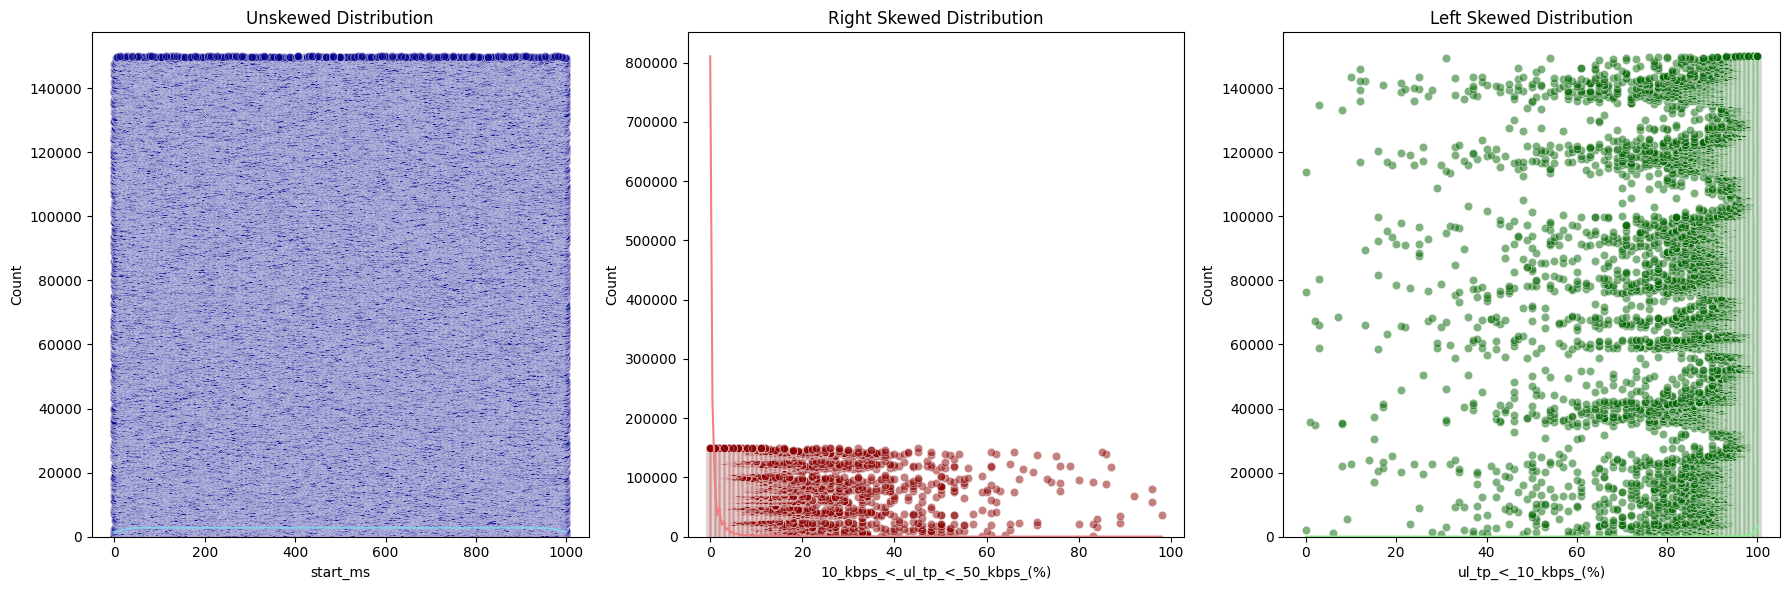

In [60]:
# Example data
unskewed_data_example = df['start_ms']
right_skewed_data_example = df['10_kbps_<_ul_tp_<_50_kbps_(%)']
left_skewed_data_example = df['ul_tp_<_10_kbps_(%)']

# Create subplots using seaborn's jointplot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Unskewed data
sns.histplot(unskewed_data_example, kde=True, ax=axes[0], color='skyblue')
sns.scatterplot(x=unskewed_data_example, y=unskewed_data_example.index, ax=axes[0], color='darkblue', alpha=0.5)
axes[0].set_title('Unskewed Distribution')

# Right-skewed data
sns.histplot(right_skewed_data_example, kde=True, ax=axes[1], color='lightcoral')
sns.scatterplot(x=right_skewed_data_example, y=right_skewed_data_example.index, ax=axes[1], color='darkred', alpha=0.5)
axes[1].set_title('Right Skewed Distribution')

# Left-skewed data
sns.histplot(left_skewed_data_example, kde=True, ax=axes[2], color='lightgreen')
sns.scatterplot(x=left_skewed_data_example, y=left_skewed_data_example.index, ax=axes[2], color='darkgreen', alpha=0.5)
axes[2].set_title('Left Skewed Distribution')

# Adjust layout
plt.tight_layout()
plt.show()



##### Fill missing values

In [61]:
unskewed_features = list(unskewed_features["Features"])
skewed_features = list(skewed_features["Features"])

# use mean method for unskewed_features
df=cleaner.fill_missing_values_numeric(df,"mean",unskewed_features)

# use median method for skewed_features
df=cleaner.fill_missing_values_numeric(df,"median",skewed_features)

# use median method for categorical values
df = cleaner.fill_missing_values_categorical(df,"mode")

In [62]:
df.isnull().sum()

bearer_id                                   0
start                                       0
start_ms                                    0
end                                         0
end_ms                                      0
dur._(ms)                                   0
imsi                                        0
msisdn/number                               0
imei                                        0
last_location_name                          0
avg_rtt_dl_(ms)                             0
avg_rtt_ul_(ms)                             0
avg_bearer_tp_dl_(kbps)                     0
avg_bearer_tp_ul_(kbps)                     0
tcp_dl_retrans._vol_(bytes)                 0
tcp_ul_retrans._vol_(bytes)                 0
dl_tp_<_50_kbps_(%)                         0
50_kbps_<_dl_tp_<_250_kbps_(%)              0
250_kbps_<_dl_tp_<_1_mbps_(%)               0
dl_tp_>_1_mbps_(%)                          0
ul_tp_<_10_kbps_(%)                         0
10_kbps_<_ul_tp_<_50_kbps_(%)     

##### Load the cleaned data postgres database

In [65]:
db_params = {
        'dbname': 'week-1',
        'user': 'postgres',
        'password': 'postgres',
        'host': 'localhost',
        'port': '5432',
    }
conn = connect_to_database(db_params)
# Create a SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}")

# Specify the table name
table_name = 'cleaned_telecom_data'

# Use pandas to_sql method to insert the data into PostgreSQL
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Close the database connection
conn.close()